In [68]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import string
from wordcloud import STOPWORDS

## Exploratory data analysis


Cette EDA est faite sur les textes bruts pour identifier les patterns initiaux. Le nettoyage sera fait dans un second temps.

# Objectif :

Comprendre nos données

Développer une première stratégie de modélisation 

# Résumé : 

 # Analyse de forme :

Variable target : target

Lignes et colonnes :(7613, 5)

Type de variables : qualitatives : 3 / quantitaves :  2

Analyse des valeurs manquantes : 

location =  33.27% de valeurs manquantes Nombre de mots location uniques : 3341 

keyword  =  0.80% de valeurs manquantes Nombre de mots clés uniques : 221

# Analyse de fond :

Visualisation de la target :  
Négatif : 57.034021 / Positif = 42.965979 

Signification des variables : 

● text - le contenu textuel du tweet 
● location - localisation d'où a été envoyé le tweet,
● keyword - un mot-clé du tweet,

Relation des variables 


presence_location :	Moyenne proche (0.664 vs 0.671), pas discriminante. L'indication de lieu n'est pas un critère différenciant fort.

presence_keyword :	Très élevé dans les deux groupes (≈ 99%), donc peu utile.

length / char_count :	Les tweets urgents (pos) sont plus longs (108 vs 95), avec des médianes à 115 vs 101. Potentiellement car on donne plus de contexte en cas d’urgence.

word_count: Même tendance : plus de mots en moyenne dans les tweets urgents (15.17 vs 14.7), mais écart léger.
stopword_count	Moins de mots fonctionnels dans les tweets urgents (4.56 vs 5.23). Cela suggère que les messages urgents vont plus à l’essentiel.

unique_word_count	: Légèrement plus haut en cas d’urgence (14.66 vs 14.09), mais assez proche.
stop_word_count	Cohérent avec stopword_count. Les tweets urgents utilisent moins de mots "vides" (3.0 en médiane contre 4.0).

url_count : Marquant ! Les tweets urgents contiennent plus souvent des URL (0.76 vs 0.50 en moyenne), peut-être des liens vers des infos critiques.

punctuation_count :	Plus de ponctuation dans les urgents (7.54 vs 6.30), ce qui peut refléter des alertes (!, ...).

hashtag_count :	Plus de hashtags dans les urgents (0.52 vs 0.39), peut-être liés à des campagnes (#Urgence, etc.).

mention_count :	Inverse intéressant : les non-urgents ont plus de mentions (0.42 vs 0.27). Peut-être qu’en urgence on ne perd pas de temps à taguer.

# 🧪 Analyse exploratoire (EDA) – Dataset Tweets & Catastrophes

---

## 1. 📋 Analyse de forme

### 🧾 Dimensions et structure
- **Taille du jeu de données** : `7613 lignes × 5 colonnes`
- **Variable cible** : `target` (0 = non-catastrophe, 1 = catastrophe)
- **Type de variables** :
  - **Qualitatives** : `text`, `location`, `keyword`
  - **Quantitatives** (dérivées du texte) : `char_count`, `word_count`, etc.

---

### 📉 Valeurs manquantes

| Variable   | % de valeurs manquantes | Nb de valeurs uniques (non-nulles) |
|------------|--------------------------|------------------------------------|
| `location` | 33.27%                   | 3341                               |
| `keyword`  | 0.80%                    | 221                                |

✅ `keyword` est bien renseignée et exploitable. `location` présente 1/3 de valeurs manquantes, elle sera utilisée avec précaution.

---

## 2. 🎯 Analyse de la variable cible (`target`)

| Classe     | Proportion |
|------------|------------|
| Non-catastrophe (`target = 0`) | 57.03% |
| Catastrophe (`target = 1`)     | 42.97% |

📌 Répartition relativement équilibrée, favorable pour l'entraînement sans sur-échantillonnage initial.

---

## 3. 🔤 Signification des variables

| Variable    | Description |
|-------------|-------------|
| `text`      | Contenu brut du tweet |
| `location`  | Localisation déclarée par l’utilisateur |
| `keyword`   | Mot-clé lié au tweet (extrait ou attribué) |

---

## 4. 📊 Analyse des variables textuelles dérivées

| Variable            | Moyenne (0) | Moyenne (1) | Observation |
|---------------------|-------------|-------------|-------------|
| `char_count`        | 95.7        | 108.1       | Tweets urgents plus longs |
| `word_count`        | 14.7        | 15.2        | Écart léger |
| `stopword_count`    | 5.2         | 4.6         | Moins de stop word dans les urgents |
| `unique_word_count` | 14.1        | 14.7        | Très léger écart |
| `stop_word_count` (médiane) | 4.0 | 3.0         | Différence confirmée |
| `url_count`         | 0.51        | 0.76        | Significativement plus d’URLs dans les urgents |
| `punctuation_count` | 6.3         | 7.5         | Plus de ponctuation dans les urgents |
| `hashtag_count`     | 0.39        | 0.52        | Légèrement plus élevé dans les urgents |
| `mention_count`     | 0.43        | 0.28        | Plus de mentions dans les non-urgents |

### 🧠 Interprétation :
> Les tweets urgents sont plus informatifs, plus directs, avec plus de contenu significatif (longueur, ponctuation, URL), et moins d’éléments sociaux ou accessoires (mentions, stopwords).

---

## 5. ☁️ Wordclouds & contenu lexical

### 🔸 Non-catastrophe (`target = 0`)
- Mots fréquents : `like`, `just`, `i'm`, `it's`, `day`, `people`, `life`, etc.
- Ton personnel, émotionnel, parfois ironique ou banal.

### 🔹 Catastrophe (`target = 1`)
- Mots fréquents : `suicide`, `disaster`, `killed`, `evacuated`, `wreckage`, `police`, etc.
- Ton dramatique, informatif, orienté crise ou urgence.

✅ Le contenu lexical brut est **déjà discriminant** entre les deux classes.

---

## 6. 🌍 Analyse des localisations

| Classe                | Top localisations |
|-----------------------|-------------------|
| Non-catastrophe (0)   | New York, USA, London, CA, UK |
| Catastrophe (1)       | USA, Nigeria, India, California, UK |

📌 Les tweets catastrophes font plus souvent référence à des **zones de crise ou pays en développement**.

---

## 7. 🧷 Analyse des `keywords`

| Keyword (target = 0) | Freq | Keyword (target = 1) | Freq |
|----------------------|------|-----------------------|------|
| body bags            | 40   | derailment            | 39   |
| armageddon           | 37   | outbreak              | 39   |
| harm                 | 37   | wreckage              | 39   |
| deluge               | 36   | oil spill             | 37   |
| ruin                 | 36   | typhoon               | 37   |

✅ Les `keywords` catastrophes sont **clairement liés à des événements réels**. À l'inverse, certains keywords du groupe 0 peuvent être ironiques ou hors contexte.

---

## ✅ Conclusion de l’EDA

- Les tweets urgents (catastrophes) se distinguent par leur **longueur, densité d’information, et lexique dramatique**.
- Certaines variables (`url_count`, `char_count`, `punctuation_count`) sont **fortement discriminantes**.
- `location` et `keyword` sont **secondaires** mais peuvent être utiles combinés au texte.
- L’analyse textuelle confirme que la **nature des mots** (suicide, disaster, evacuated…) est un signal fort.




In [69]:
df = pd.read_csv("../data/train_tweets.csv")


## Apercu des valeurs 

In [70]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [71]:
df.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [72]:
df.shape

(7613, 5)

<Axes: >

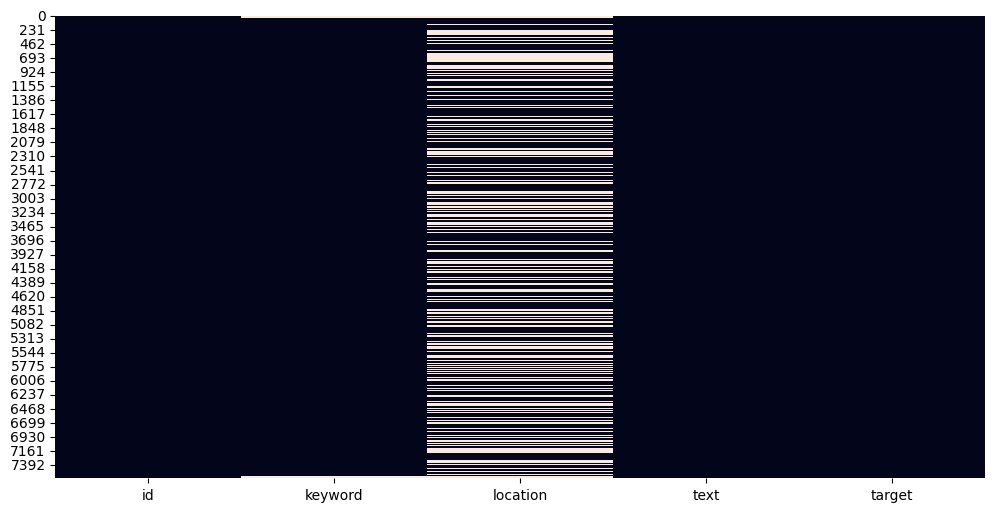

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)

In [74]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False)

location    33.272035
keyword      0.801261
id           0.000000
text         0.000000
target       0.000000
dtype: float64

In [75]:
nb_uniques = df["keyword"].nunique()  # nombre de mots-clés uniques (≠ valeurs nulles)
nb_non_nulls = df["keyword"].notnull().sum()  # cellules non vides
pourcentage_remplis = nb_non_nulls / len(df) * 100

print("Nombre de mots clés uniques :", nb_uniques)
print(f"Pourcentage de cellules remplies : {pourcentage_remplis:.2f}%")


Nombre de mots clés uniques : 221
Pourcentage de cellules remplies : 99.20%


In [76]:
nb_uniques = df["location"].nunique()  # nombre de mots-clés uniques (≠ valeurs nulles)
nb_non_nulls = df["location"].notnull().sum()  # cellules non vides
pourcentage_remplis = nb_non_nulls / len(df) * 100

print("Nombre de mots location uniques :", nb_uniques)
print(f"Pourcentage de cellules remplies : {pourcentage_remplis:.2f}%")


Nombre de mots location uniques : 3341
Pourcentage de cellules remplies : 66.73%


In [77]:
df['presence_location'] = df['location'].notnull().astype(int)
df['presence_keyword'] = df['keyword'].notnull().astype(int)

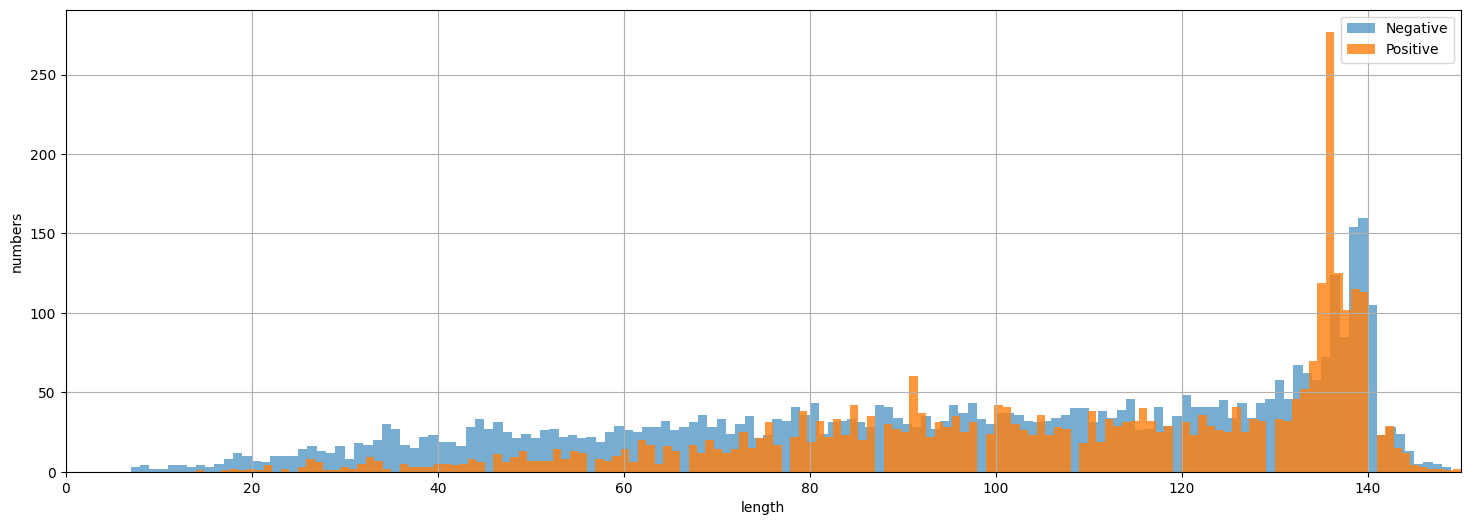

In [78]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)
df['length'] = df['text'].apply(length)
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df[df['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Negative')
plt.hist(df[df['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Positive')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

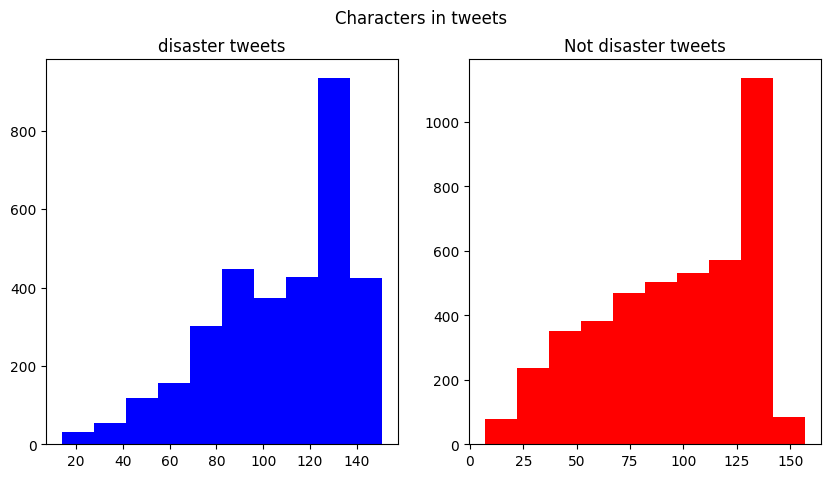

In [79]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=df[df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [80]:
df = df.drop("id", axis=1)


In [81]:
print(df.shape)

(7613, 7)


In [82]:
df['target'].value_counts(normalize=True) * 100

0    57.034021
1    42.965979
Name: target, dtype: float64

In [83]:
df_negative = df[df['target'] == 0]
df_positive = df[df['target'] == 1]

In [84]:
# Fonction pour obtenir les mots les plus fréquents
def get_top_words(series, n=10):
    words = " ".join(series.fillna("").astype(str)).lower().split()
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)



# Extraction des top mots
top_words_0 = get_top_words(df_negative["keyword"], 10)
top_words_1 = get_top_words(df_positive["keyword"], 10)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Keyword (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Keyword (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Keyword (Non-catastrophe),Fréquence,Keyword (Catastrophe),Fréquence
0,body%20bags,40,derailment,39
1,armageddon,37,outbreak,39
2,harm,37,wreckage,39
3,deluge,36,debris,37
4,ruin,36,oil%20spill,37
5,wrecked,36,typhoon,37
6,explode,35,evacuated,32
7,fear,35,rescuers,32
8,siren,35,suicide%20bomb,32
9,twister,35,suicide%20bombing,32


In [85]:
# Extraction des top mots
top_words_0 = get_top_words(df_negative["location"], 10)
top_words_1 = get_top_words(df_positive["location"], 10)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Location (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Location (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Location (Non-catastrophe),Fréquence,Location (Catastrophe),Fréquence
0,new,129,usa,126
1,usa,124,new,80
2,ca,86,ca,57
3,york,77,united,44
4,london,52,nigeria,42
5,united,51,canada,41
6,uk,49,uk,40
7,ny,46,india,34
8,england,44,san,33
9,canada,43,states,33


In [86]:
# Extraction des top mots
top_words_0 = get_top_words(df_negative["text"], 10)
top_words_1 = get_top_words(df_positive["text"], 10)

# Tableau combiné
df_top_0 = pd.DataFrame(top_words_0, columns=["Mot (Non-catastrophe)", "Fréquence"])
df_top_1 = pd.DataFrame(top_words_1, columns=["Mot (Catastrophe)", "Fréquence"])
display(pd.concat([df_top_0, df_top_1], axis=1))


,Mot (Non-catastrophe),Fréquence,Mot (Catastrophe),Fréquence
0,-,374,-,389
1,like,250,...,106
2,just,229,&amp;,105
3,i'm,195,suicide,103
4,&amp;,190,disaster,97
5,??,183,police,94
6,new,163,people,93
7,it's,124,killed,92
8,don't,122,like,91
9,body,106,california,88


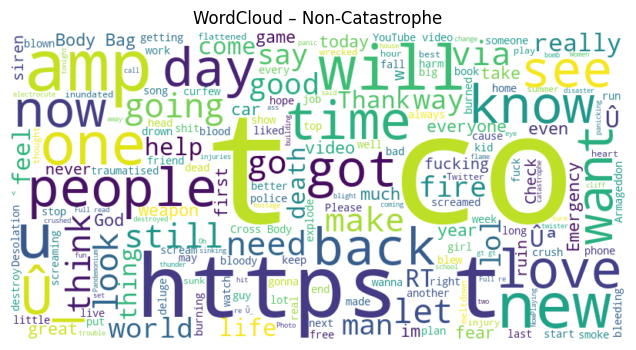

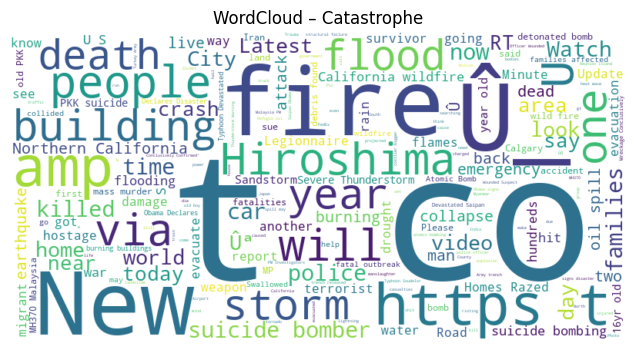

In [87]:
# Concaténer les textes par classe
text_0 = " ".join(df_negative["text"])
text_1 = " ".join(df_positive["text"])

# Générer les nuages de mots
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)

# Affichage du WordCloud pour target = 0
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Non-Catastrophe")
plt.show()

# Affichage du WordCloud pour target = 1
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Catastrophe")
plt.show()

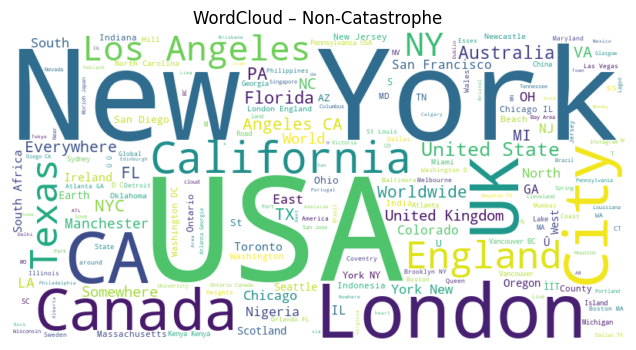

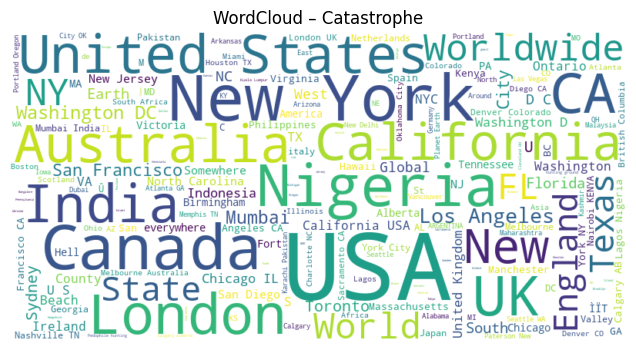

In [88]:
# Concaténer les textes par classe
text_0 = " ".join(df_negative["location"].dropna())
text_1 = " ".join(df_positive["location"].dropna())


# Générer les nuages de mots
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_0)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)

# Affichage du WordCloud pour target = 0
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Non-Catastrophe")
plt.show()

# Affichage du WordCloud pour target = 1
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud – Catastrophe")
plt.show()


## Ajout features

In [89]:
# Nombre de caractères par tweet
df['char_count'] = df['text'].apply(len)

# Nombre de mots par tweet
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Nb de stop-words
df["stopword_count"] = df["text"].apply(
    lambda x: sum(1 for w in x.lower().split() if w in ENGLISH_STOP_WORDS)
)



In [90]:
# Nombre total de mots dans chaque tweet
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Nombre de mots uniques dans chaque tweet
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

# Nombre de stopwords (mots vides comme 'le', 'et', 'mais'...) dans chaque tweet
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# Nombre de liens URL présents dans chaque tweet
df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# Longueur moyenne des mots dans chaque tweet
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Nombre total de caractères (lettres, espaces, ponctuations...) dans chaque tweet
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Nombre de signes de ponctuation dans chaque tweet
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Nombre de hashtags (#) dans chaque tweet
df['hashtag_count'] = df['text'].apply(lambda x: str(x).count('#'))

# Nombre de mentions (@) dans chaque tweet
df['mention_count'] = df['text'].apply(lambda x: str(x).count('@'))


In [91]:
df.dtypes.value_counts()

int64      13
object      3
float64     1
dtype: int64

In [102]:
df_negative = df[df['target'] == 0]
df_positive = df[df['target'] == 1]

In [104]:
# Calcul des stats descriptives
desc_all = df[num_cols].describe().T
desc_neg = df_negative[num_cols].describe().T
desc_pos = df_positive[num_cols].describe().T

# Renommage des colonnes pour préciser l’origine
desc_all.columns = [f"{col}_all" for col in desc_all.columns]
desc_neg.columns = [f"{col}_neg" for col in desc_neg.columns]
desc_pos.columns = [f"{col}_pos" for col in desc_pos.columns]

# Fusion sur l'index (nom des colonnes numériques)
summary = desc_all.join(desc_neg).join(desc_pos)

# Réorganisation (optionnelle) des colonnes
ordered_cols = []
for stat in ["count", "mean", "50%", "25%", "75%"]:
    ordered_cols.extend([
        f"{stat}_all", f"{stat}_neg", f"{stat}_pos"
    ])

# Affichage
summary[ordered_cols]

,count_all,count_neg,count_pos,mean_all,mean_neg,mean_pos,50%_all,50%_neg,50%_pos,25%_all,25%_neg,25%_pos,75%_all,75%_neg,75%_pos
target,7613.0,4342.0,3271.0,0.429660,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
presence_location,7613.0,4342.0,3271.0,0.667280,0.664210,0.671354,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
presence_keyword,7613.0,4342.0,3271.0,0.991987,0.995624,0.987160,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
length,7613.0,4342.0,3271.0,101.037436,95.706817,108.113421,107.0,101.0,115.0,78.0,68.0,88.0,133.0,130.0,136.0
char_count,7613.0,4342.0,3271.0,101.037436,95.706817,108.113421,107.0,101.0,115.0,78.0,68.0,88.0,133.0,130.0,136.0
word_count,7613.0,4342.0,3271.0,14.903586,14.704744,15.167533,15.0,15.0,15.0,11.0,10.0,11.0,19.0,19.0,19.0
stopword_count,7613.0,4342.0,3271.0,4.947984,5.238139,4.562825,4.0,4.0,4.0,2.0,2.0,2.0,7.0,8.0,7.0
unique_word_count,7613.0,4342.0,3271.0,14.340733,14.096499,14.664934,14.0,14.0,15.0,11.0,10.0,11.0,18.0,18.0,18.0
stop_word_count,7613.0,4342.0,3271.0,4.672928,5.016582,4.216753,4.0,4.0,3.0,2.0,2.0,2.0,7.0,7.0,6.0
url_count,7613.0,4342.0,3271.0,0.620255,0.507600,0.769795,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


## Analyse des features

## 📊 Tests statistiques des différences

Pour valider nos observations, testons si les différences sont statistiquement significatives :

In [105]:
from scipy.stats import ttest_ind

# Tests de Student pour les variables les plus prometteuses
features_to_test = ['char_count', 'url_count', 'punctuation_count', 'hashtag_count', 'mention_count']

print("🧪 Tests statistiques (p-value < 0.05 = différence significative)")
print("-" * 70)

for feature in features_to_test:
    group_0 = df_negative[feature]
    group_1 = df_positive[feature]
    
    t_stat, p_value = ttest_ind(group_0, group_1)
    significance = "✅ Significatif" if p_value < 0.05 else "❌ Non significatif"
    
    print(f"{feature:20s} | p-value: {p_value:.6f} | {significance}")
    print(f"{'':20s} | Moyenne 0: {group_0.mean():.2f} | Moyenne 1: {group_1.mean():.2f}")
    print("-" * 70)

🧪 Tests statistiques (p-value < 0.05 = différence significative)
----------------------------------------------------------------------
char_count           | p-value: 0.000000 | ✅ Significatif
                     | Moyenne 0: 95.71 | Moyenne 1: 108.11
----------------------------------------------------------------------
url_count            | p-value: 0.000000 | ✅ Significatif
                     | Moyenne 0: 0.51 | Moyenne 1: 0.77
----------------------------------------------------------------------
punctuation_count    | p-value: 0.000000 | ✅ Significatif
                     | Moyenne 0: 6.31 | Moyenne 1: 7.54
----------------------------------------------------------------------
hashtag_count        | p-value: 0.000000 | ✅ Significatif
                     | Moyenne 0: 0.39 | Moyenne 1: 0.52
----------------------------------------------------------------------
mention_count        | p-value: 0.000000 | ✅ Significatif
                     | Moyenne 0: 0.43 | Moyenne 1: 0.28
--

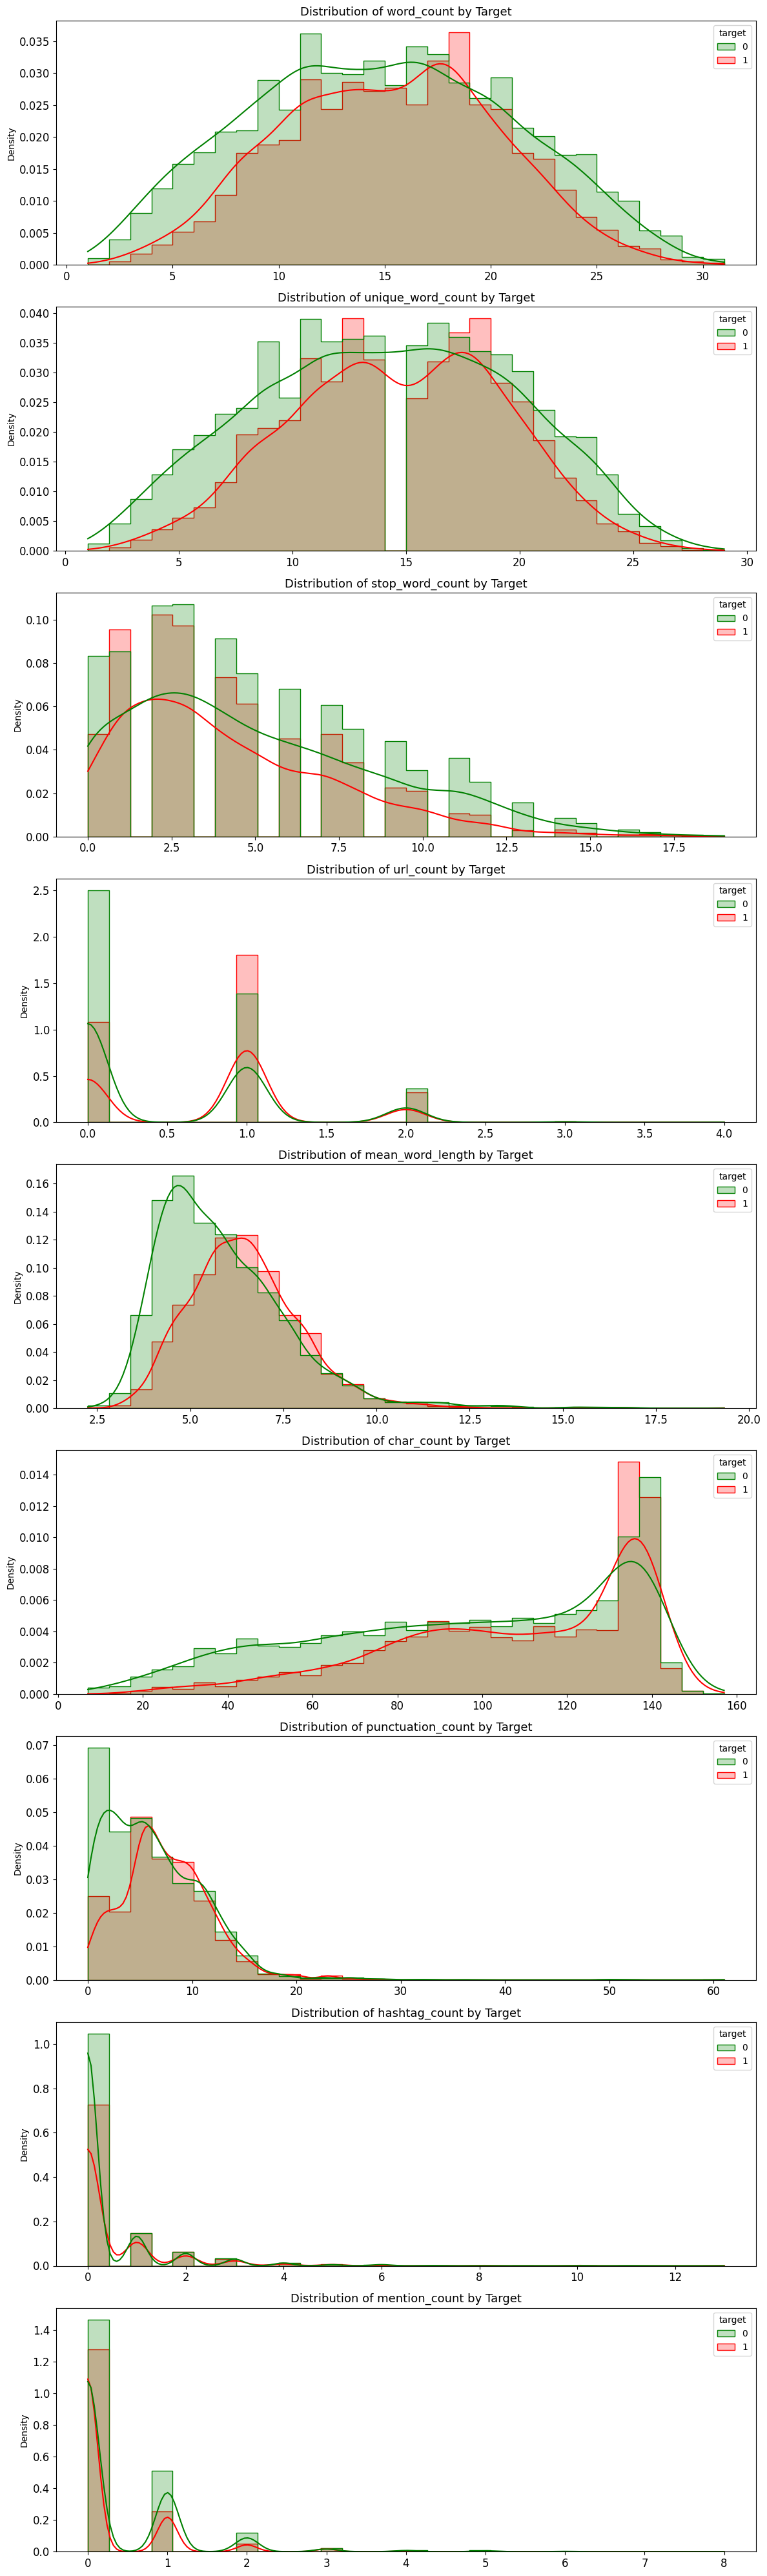

In [ ]:
# Liste des features à analyser
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count',
                'mean_word_length', 'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

# Filtre pour les tweets liés à des catastrophes
DISASTER_TWEETS = df['target'] == 1

# Création de la figure avec sous-graphiques
fig, axes = plt.subplots(nrows=len(METAFEATURES), ncols=1, figsize=(12, 40), dpi=100)

# Pour chaque feature, on trace deux courbes : disaster vs non-disaster
for i, feature in enumerate(METAFEATURES):
    sns.histplot(data=df, x=feature, hue='target', kde=True, ax=axes[i], bins=30,
                 palette={0: "green", 1: "red"}, element="step", stat="density")
    
    axes[i].set_title(f'Distribution of {feature} by Target', fontsize=13)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_words[:top_n], columns=['ngram', 'count'])

In [ ]:
def plot_all_ngrams(df, target_value):
    text_data = df[df['target'] == target_value]['text']

    bigrams = get_top_ngrams(text_data, ngram_range=(2, 2), top_n=20)
    trigrams = get_top_ngrams(text_data, ngram_range=(3, 3), top_n=20)
    quadgrams = get_top_ngrams(text_data, ngram_range=(4, 4), top_n=20)

    fig, axes = plt.subplots(1, 3, figsize=(22, 10))

    for ax, data, title in zip(
        axes,
        [bigrams, trigrams, quadgrams],
        ['Bigrammes', 'Trigrammes', 'Quadgrammes']
    ):
        ngram_df = pd.DataFrame(data, columns=['ngram', 'count'])
        sns.barplot(x='count', y='ngram', data=ngram_df, ax=ax, palette='viridis')
        ax.set_title(f"{title} pour target = {target_value}")
        ax.set_xlabel("Fréquence")
        ax.set_ylabel("")

    plt.tight_layout()
    plt.show()


/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_11873/4163899400.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, ax=ax, palette='viridis')
/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_11873/4163899400.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, ax=ax, palette='viridis')
/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_11873/4163899400.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_d

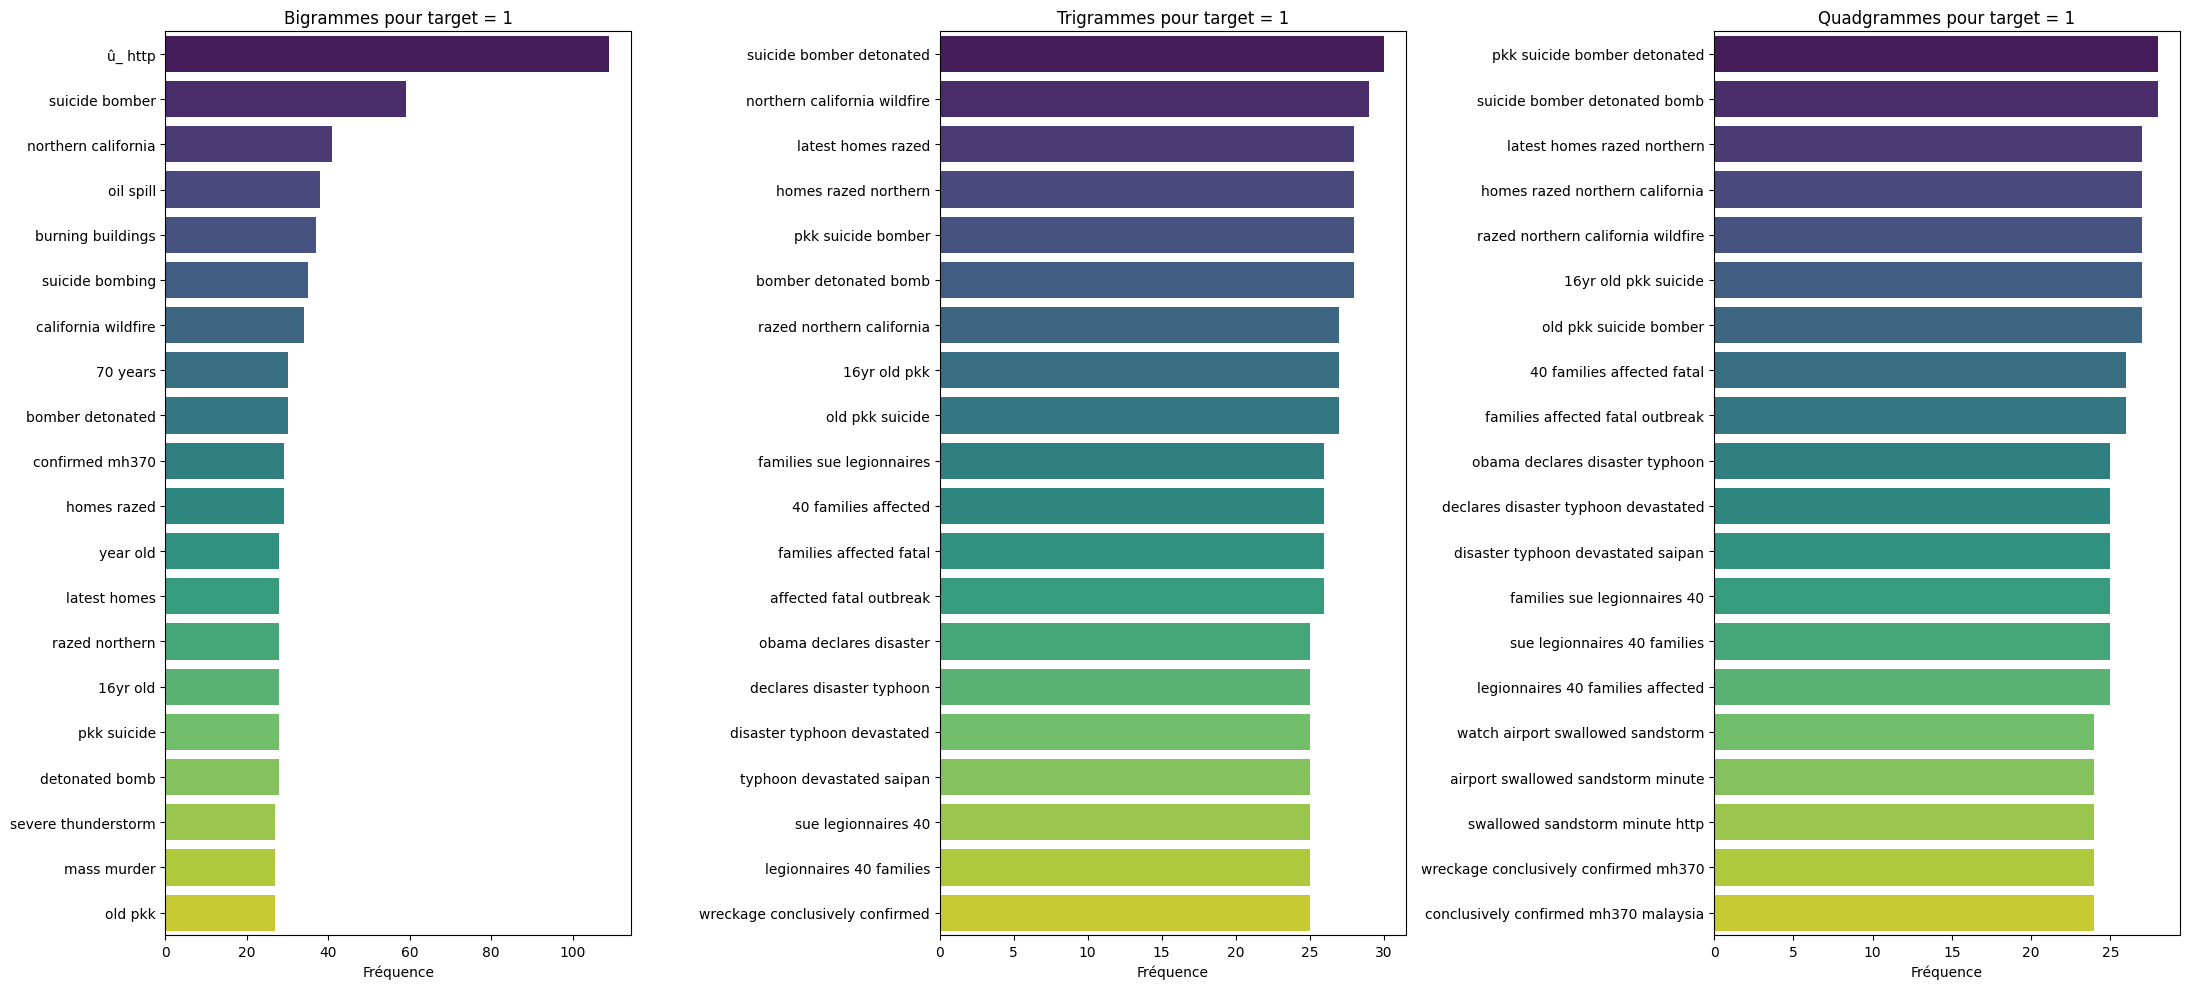

/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_11873/4163899400.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, ax=ax, palette='viridis')
/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_11873/4163899400.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, ax=ax, palette='viridis')
/var/folders/s5/bjr8wb2s53z275k32l1crzqw0000gn/T/ipykernel_11873/4163899400.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_d

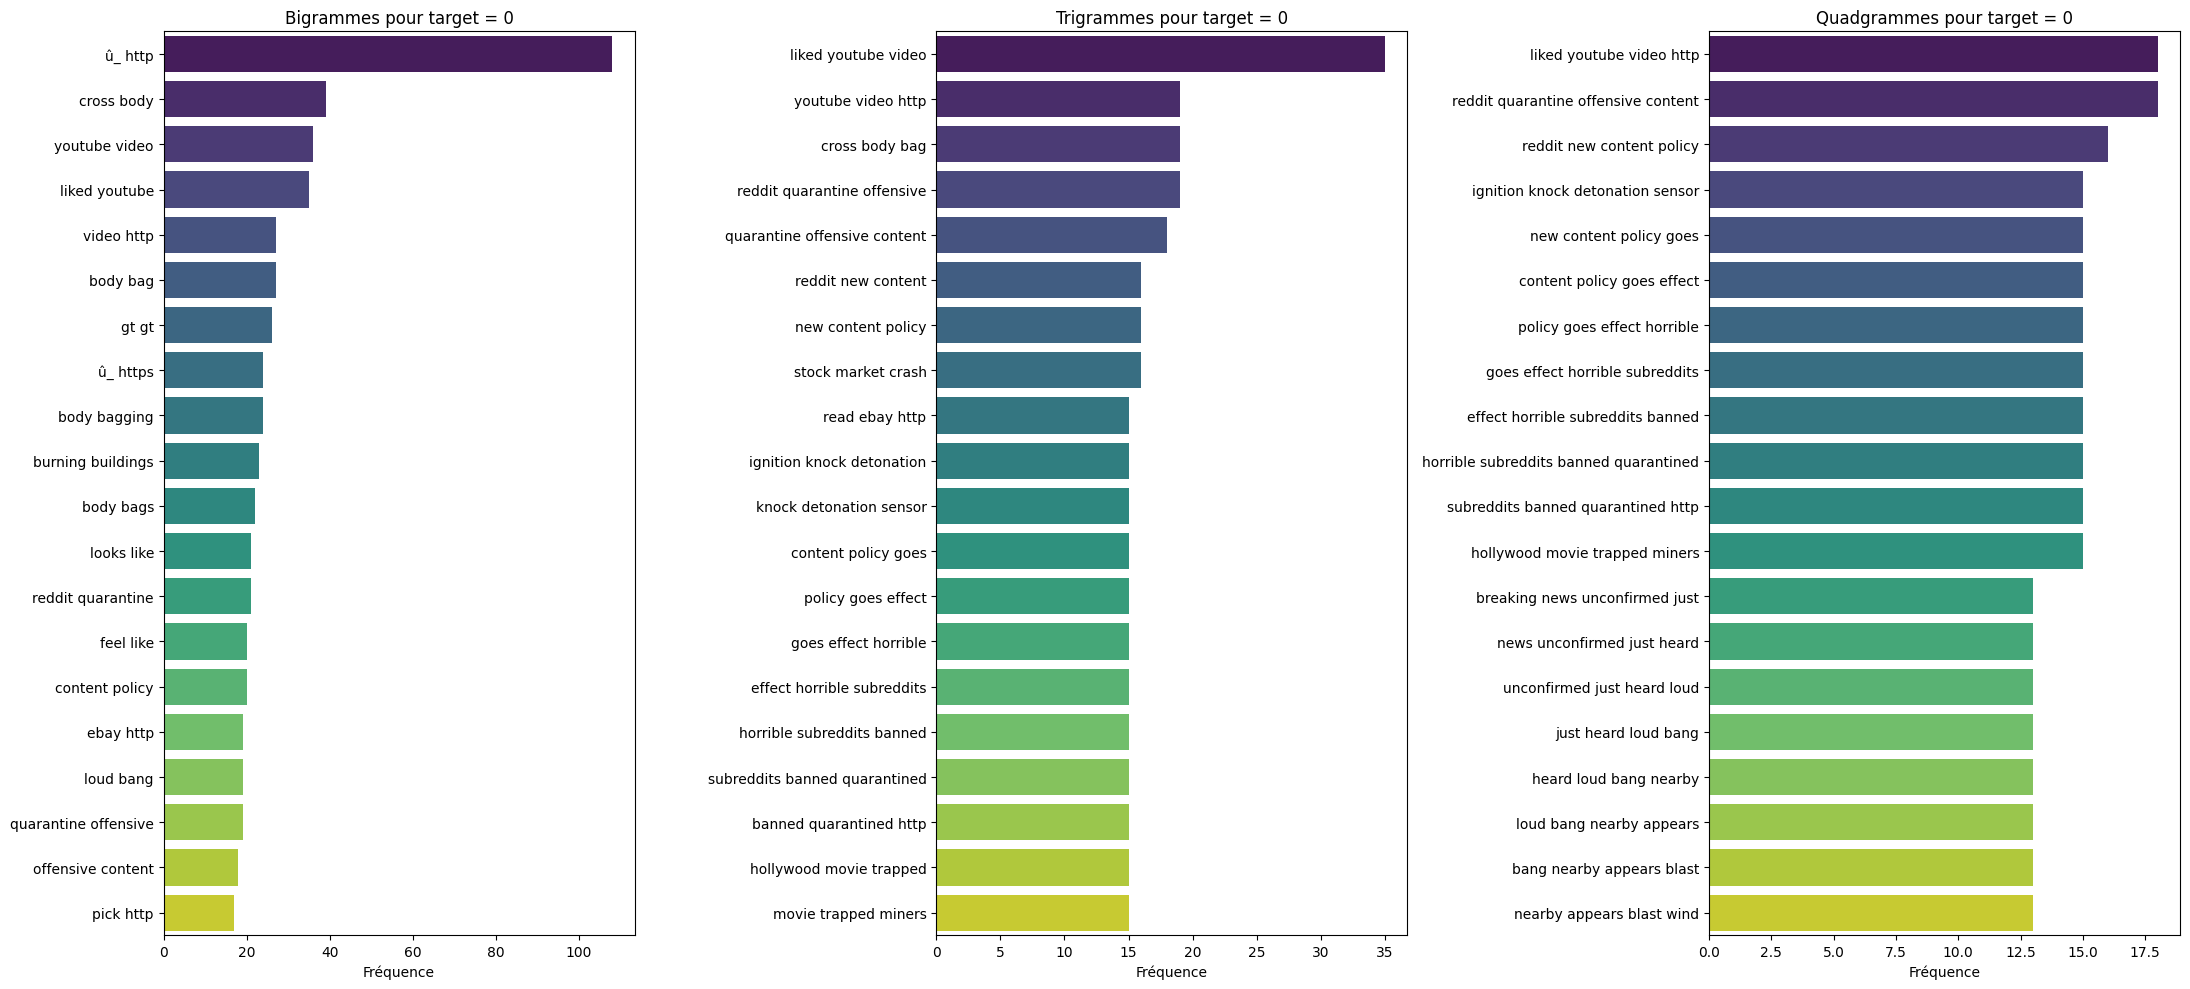

In [ ]:
plot_all_ngrams(df, 1)  # Pour les tweets de catastrophe
plot_all_ngrams(df, 0)  # Pour les autres


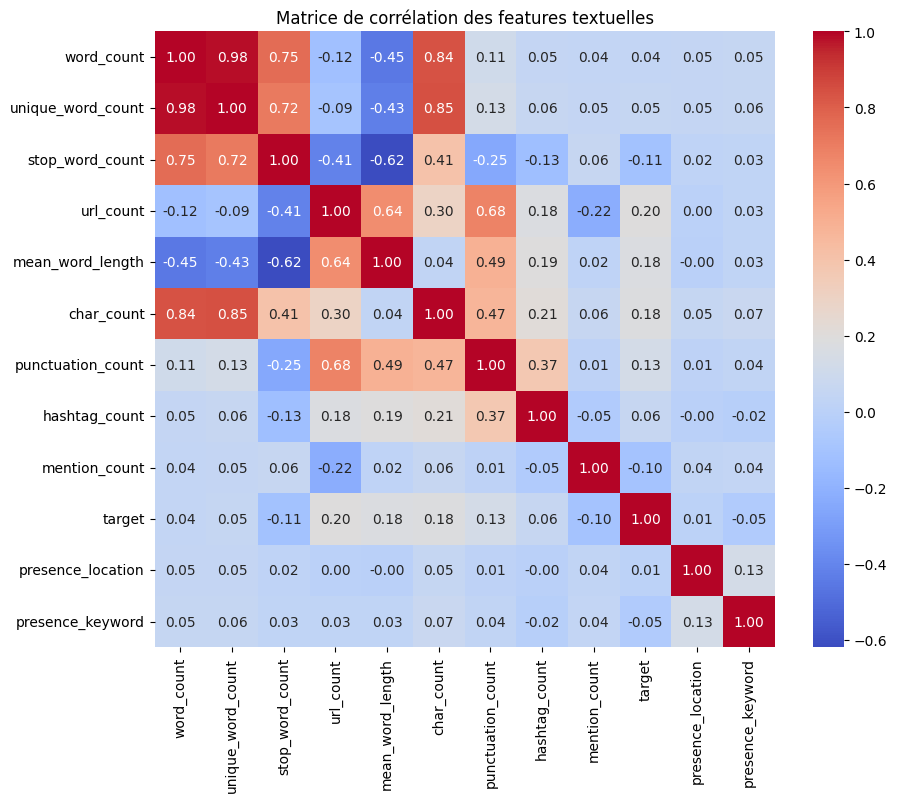

In [ ]:
features = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count',
            'mean_word_length', 'char_count', 'punctuation_count', 
            'hashtag_count', 'mention_count', 'target',
            'presence_location', 'presence_keyword']


corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des features textuelles")
plt.show()

In [ ]:
df.to_pickle("df.pkl")


## 🚀 Recommandations pour la modélisation

### 📝 **Variables les plus prometteuses**
1. **`text`** : Contenu principal → TF-IDF ou embeddings
2. **`char_count`** : Longueur significativement différente  
3. **`url_count`** : Très discriminant (urgence = plus d'URLs)
4. **`punctuation_count`** : Indicateur de ton dramatique
5. **`keyword`** : Bien renseigné, vocabulaire spécialisé

### 🛠️ **Stratégies de preprocessing**
- **Nettoyage du texte** : URLs, mentions, caractères spéciaux
- **Gestion des valeurs manquantes** : `location` (33%) → imputation ou indicateur binaire
- **Normalisation** : Longueurs et comptages → StandardScaler

### 🤖 **Approches de modélisation suggérées**
1. **Baseline** : Logistic Regression + TF-IDF
2. **Avancé** : Random Forest avec features textuelles + métadonnées  
3. **Deep Learning** : BERT pour la compréhension contextuelle

### 📊 **Métriques d'évaluation**
- **Accuracy** : Vue d'ensemble (classes équilibrées)
- **F1-Score** : Important pour détecter les vraies catastrophes
- **Recall** : Critique → ne pas manquer une vraie catastrophe !